In [1]:
#loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading data
data=pd.read_csv("./data/pima-data.csv")

In [3]:
#Checking the shape of data
data.shape

(768, 10)

In [4]:
#Checking the first wo records of the data
data.head(2)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False


In [5]:
#Check if any null value os present in the data
data.isnull().values.any()

False

So there are no null values in the data

In [6]:
#Checking the datatypes of features
data.dtypes

num_preg          int64
glucose_conc      int64
diastolic_bp      int64
thickness         int64
insulin           int64
bmi             float64
diab_pred       float64
age               int64
skin            float64
diabetes           bool
dtype: object

In [7]:
#Check for the structure of data
data.describe()


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.809136
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.628517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.906200
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.260800
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,3.900600


The minimum value for features num_preg, glucose_conc, diastolic_bp, thickness, insulin, bmi, skin is zero and except num_preg 
other features cannot be zeroes they were considered to be not recorded.

In [8]:
#Check the count of the records where features are having the zero value
print("Number of cases with 0 num_preg are {}".format(len(data[data['num_preg']==0])))
print("Number of cases with 0 glucose_conc are {}".format(len(data[data['glucose_conc']==0])))
print("Number of cases with 0 diastolic_bp are {}".format(len(data[data['diastolic_bp']==0])))
print("Number of cases with 0 thickness are {}".format(len(data[data['thickness']==0])))
print("Number of cases with 0 insulin are {}".format(len(data[data['insulin']==0])))
print("Number of cases with 0 bmi are {}".format(len(data[data['bmi']==0])))
print("Number of cases with 0 diab_pred are {}".format(len(data[data['diab_pred']==0])))
print("Number of cases with 0 age are {}".format(len(data[data['age']==0])))
print("Number of cases with 0 skin are {}".format(len(data[data['skin']==0])))

Number of cases with 0 num_preg are 111
Number of cases with 0 glucose_conc are 5
Number of cases with 0 diastolic_bp are 35
Number of cases with 0 thickness are 227
Number of cases with 0 insulin are 374
Number of cases with 0 bmi are 11
Number of cases with 0 diab_pred are 0
Number of cases with 0 age are 0
Number of cases with 0 skin are 227


So there are 5 cases with zero glucose_conc, 35 cases with zero diastolic_bp , 227 cases with zero thickness, 374 cases with zero insulin, 11 cases with zero bmi, and 227 cases with zero skin. 
These cases has to be imputed using mean.

In [9]:
#Imputing the zero values of features with their mean values except for num_preg
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(missing_values=0, strategy="mean")
imputer=imputer.fit(data.iloc[:,1:-1])
data.iloc[:,1:-1]=imputer.transform(data.iloc[:,1:-1])

In [10]:
#Checking if the zero has been correctly replaced by mean values
data.describe().min()

num_preg         0.000000
glucose_conc    30.435949
diastolic_bp    12.096346
thickness        7.000000
insulin         14.000000
bmi              6.875151
diab_pred        0.078000
age             11.760232
skin             0.275800
dtype: float64

So except for num_preg, zeroes in other features has been imputed with mean of their respective columns.

In [11]:
#Replacing the True/False with 0 and 1
target_dict={True:1, False:0}
data["diabetes"]=data["diabetes"].map(target_dict)

In [12]:
#Checking if True/False in diabetes column has been correctly replaced with 1 and 0 respectively
pd.unique(data.diabetes)

array([1, 0], dtype=int64)

So, True and False in the diabetes columns has been replaced with 1 and 0 respectively

In [13]:
#Check for the number of records with positve and negative cases of diabetes
X=data["diabetes"].value_counts()
print("Number of cases with diabetes equal {} are {}".format(X.index[0],X[0]))
print("Number of cases with diabetes equal {} are {}".format(X.index[1],X[1]))
print("Percentage of cases in diabetes equals '0': {}\nPercentage of case with diabetes equals '1': {}".
      format(round(X[0]/sum(X),2),round(X[1]/sum(X),2)))

Number of cases with diabetes equal 0 are 500
Number of cases with diabetes equal 1 are 268
Percentage of cases in diabetes equals '0': 0.65
Percentage of case with diabetes equals '1': 0.35


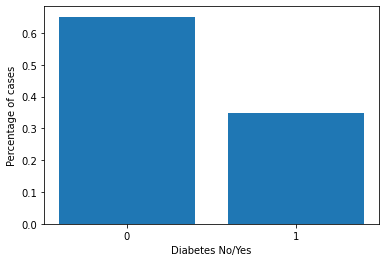

In [14]:
plt.bar(X.index,X/sum(X))
plt.xticks((0,1))
plt.xlabel("Diabetes No/Yes")
plt.ylabel("Percentage of cases")
plt.show()

So there are 65% cases with no diabetes and 35% cases with daiabetes. So this data is slightly imbalanced but still it is good to continue.

In [15]:
#Train/test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.iloc[:,:-1],data.iloc[:,[-1]], test_size=0.3)

In [16]:
print(f"Shape of X_train is {X_train.shape}")
print(f"Shape of X_test is {X_test.shape}")
print(f"Shape of y_train is {y_train.shape}")
print(f"Shape of y_test is {y_test.shape}")

Shape of X_train is (537, 9)
Shape of X_test is (231, 9)
Shape of y_train is (537, 1)
Shape of y_test is (231, 1)


Data has been split into train and test set to feed it to machine learning algorithm 

### Implementing RandomForestClassifier

In [123]:
#Applying Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(random_state=10)
clf.fit(X_train,y_train)
predict=clf.predict(X_test)

In [314]:
#Calculating the Accuracy Score for 
from sklearn.metrics import confusion_matrix,accuracy_score
print(f"Accuracy score from Random Forest Model is {accuracy_score(y_test,predict)}")

Accuracy score from Random Forest Model is 0.7056277056277056


In [280]:
confusion_matrix(y_pred=predict,y_true=y_test)

array([[120,  24],
       [ 44,  43]], dtype=int64)

In [279]:
tn,fp,fn,tp=confusion_matrix(y_pred=predict,y_true=y_test).ravel()
print(f"True Negative Predicted {tn}")
print(f"True Positive Predicted {tp}")
print(f"False Positive Predicted {fp}")
print(f"False Negative Predicted {fn}")

True Negative Predicted 120
True Positive Predicted 43
False Positive Predicted 24
False Negative Predicted 44


In [302]:
#Calculating the feature importance score for each feature
features=data.iloc[:,:-1].columns.ravel()
fet_imp=list(zip(features,clf.feature_importances_))
col=[]
height=[]
for l in fet_imp:
    col.append(l[0])
    height.append(l[1])

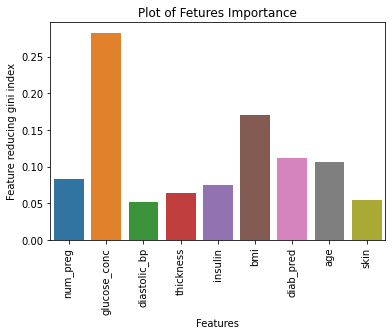

In [315]:
#Plotting feature importance
sns.barplot(x=col,y=height)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Feature reducing gini index")
plt.title("Plot of Fetures Importance")
plt.show()

So based on the feature importance glucose_conc is major contributor in predicting whether a person has diabetes or not followed by bmi i.e body mass index

### Tuning Random Forest Classfier using GridSearchCV:
* GridSearchCV works for small number of hyperparameters
* It is used when all the hyperparameters affects the validation score equally

In [325]:
#Tuning Random Forest Classifer
from sklearn.model_selection import GridSearchCV
classifier=RandomForestClassifier(random_state=0)
parameters={"bootstrap":[True],
           "n_estimators":[10,20,50,100,200,300,400,500],
           "criterion":['gini',"entropy"],
           "max_depth":[10,20,40,50,80,100],
           "min_samples_split":[8,10,15,20],
           "min_samples_leaf":[2,5,10,15],
           "max_features":[2,3,4],
           }
#Initiate the grid search model
grid_search=GridSearchCV(estimator=classifier,param_grid=parameters,n_jobs=-1,verbose=2,cv=5,scoring='accuracy')
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 4608 candidates, totalling 23040 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 7922 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 9097 tasks      | e

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=Fa...
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True], 

In [326]:
grid_search.best_score_

0.7877094972067039

In [327]:
#Best RandomForest Estimator as per the GridSearchCV
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [328]:
#Parameters of best Randomforest Estimator from GridSearchCv
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 20}

In [330]:
#Implementing RandomForestClassfier from best parameters obtained from GridSearchCV
clf_gscv=RandomForestClassifier(bootstrap=True,criterion="entropy",max_depth=10,max_features=4,min_samples_leaf=2,
                           min_samples_split=10,n_estimators=20,random_state=10)
clf_gscv.fit(X_train,y_train)
predict=clf_gscv.predict(X_test)

In [332]:
#Calculating the accuracy
accuracy_grid=accuracy_score(y_pred=predict,y_true=y_test)
print(f"Accuracy of RandomForestClassifier after GridSearchCv is {accuracy_grid}")

Accuracy of RandomForestClassifier after GridSearchCv is 0.7532467532467533


So accuracy of RandomForestClassifier improves from the first estimators. Initially accuracy score was approx 70% which now improves to 75%.

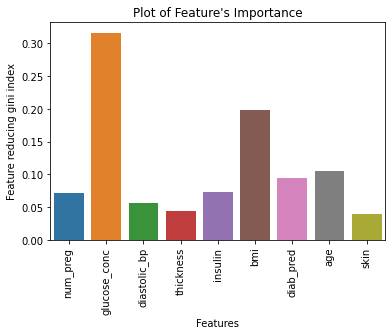

In [343]:
f_imp=list(zip(features,clf_gscv.feature_importances_))
colname=[]
gini=[]
for var in f_imp:
    colname.append(var[0])
    gini.append(var[1])

#Plotting feature importance
sns.barplot(x=colname,y=gini)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Feature reducing gini index")
plt.title("Plot of Feature's Importance")
plt.show()


So feature importance remains the same where glucose_conc is impacting the prediction most follwed by bmi, age and others

### Tuning RandomForestClassifier Using RandomisedSearchCV:
* Used when number of hyperparameters are growing
* Also when the hyperparametes impact the validation unequally

In [125]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

starttime=timer(None)
est=RandomForestClassifier(random_state=10)
param_dist={
    "bootstrap":[True,False],
    "n_estimators":[10,20,50,100,200,300,400,500],
    "criterion":['gini','entropy'],
    'max_features':[2,3,4],
    "min_samples_leaf":[2,5,10,15],
    'min_samples_split':[8,10,15,20],
    "max_depth":[10,20,40,50,80,100]
}

def hyperparamtuning_randomcv(est,param_dist,Xtrain,ytrain,cv,iter):
    randcv=RandomizedSearchCV(estimator=est,param_distributions=param_dist,n_iter=iter,
                              n_jobs=-1,cv=cv)
    randcv.fit(Xtrain,ytrain)                         
    best_score=randcv.best_score_
    best_params=randcv.best_params_
    return (best_score,best_params)

best_score,best_params=hyperparamtuning_randomcv(est,param_dist,X_train,y_train,cv=5,iter=40)
timer(starttime)

C:\Users\sagar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



Time taken is 0 hour 0 minutes and 17.11 seconds.


In [396]:
best_score

0.7821229050279329

In [397]:
best_params

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 4,
 'max_depth': 40,
 'criterion': 'entropy',
 'bootstrap': True}

In [126]:
clf_random=RandomForestClassifier(n_estimators=200,min_samples_split=10,min_samples_leaf=5,max_features=4,max_depth=40,
                                 criterion="entropy",bootstrap=True, random_state=10)
clf_random.fit(X_train,y_train)
predict_random=clf_random.predict(X_test)

accuracy_random=accuracy_score(y_pred=predict_random,y_true=y_test)
print(f"Accuracy score of RandomForestClassifier on y-test from RandomizedSeachCV is {accuracy_random}")

Accuracy score of RandomForestClassifier on y-test from RandomizedSeachCV is 0.7316017316017316


In [128]:
#Using Cross-validation score for selecting models
from sklearn.model_selection import cross_val_score
cross_val=cross_val_score(estimator=clf_random,X=data.iloc[:,1:-1],y=data.iloc[:,-1],scoring="accuracy").mean()
cross_val

0.7618281857976653

So the accuracy obtained from RandomisedSearchCV's best parameters is slightly less then the accuracy obtained from the best parameters of GridSearchCV

### Implementing XGBoost Classifier

* Xgboost, capable of doing parallel computation on single machine making it 10 times faster then the existing boosting framework.
* Can be used for regression, classification and ranking
* Has additional features of doing cross-validation and finding feature importance.
* Can hadle missing values
* Robust to outliers.
* Does not requires feature scaling.
* Can handle mixed predictors like both qualitative predictors and quantitative predictors.
* It cannot extract linear combination of features.
* It has high variance. (Reduces variance by combining output of different trees)
* It is computationally scalable.


In [63]:
#Fitting XGBoost Classifier on training data
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
clf_xgb=XGBClassifier()
clf_xgb.fit(X_train,y_train)

#Predicting on test data
pred_xgb=clf_xgb.predict(X_test)

#Calculating the accuracy score
acc_xgb=accuracy_score(y_pred=pred_xgb,y_true=y_test)
print(f"Prediction accuracy from the base XGBoostClassifier is {acc_xgb}")

#Calculating the confusion matrix
cm=confusion_matrix(y_test,pred_xgb)
print(f"Confusion matrix is\n{cm}")


Prediction accuracy from the base XGBoostClassifier is 0.696969696969697
Confusion matrix is
[[126  22]
 [ 48  35]]


In [61]:
#Timer function
from datetime import datetime
def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        t_hour, temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        print("\nTime taken is %i hour %i minutes and %s seconds."%(t_hour, tmin,round(tsec,2)))

In [108]:
#Hyperparameter Optimization XGBoost Classifier using RandomisedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
est=XGBClassifier(n_jobs=-1)
parameters={
    "max_depth":[3,4,5,6,7,8,8,10,15,20],
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.10,0.20,0.30,0.40,0.50],
    "colsample_bytree":[0.2,0.3,0.4,0.5,0.6]
    }

def tuning_xgb(estimator, para_dist,scoring, iterations,crossval, Xtrain,ytrain):
    random_xgb=RandomizedSearchCV(estimator=estimator,param_distributions=para_dist, scoring=scoring,
                                  random_state=10, n_iter=iterations, cv=crossval)
    random_xgb.fit(Xtrain,ytrain)
    best_score=random_xgb.best_score_
    best_param=random_xgb.best_params_
    best_estimator=random_xgb.best_estimator_
    return (best_score, best_param,best_estimator)

start_time=timer(None)
bestscore_xgb,bestparam_xgb,best_estimator=tuning_xgb(est,parameters,scoring="accuracy",iterations=5,
                                       crossval=9,Xtrain=X_train,ytrain=y_train)
timer(start_time)


Time taken is 0 hour 0 minutes and 3.89 seconds.


In [109]:
print(f"RandomizedSearchCV best score {bestscore_xgb}")

RandomizedSearchCV best score 0.7839851024208566


In [110]:
print(f"RandomizedSearchCV best parameters\n{bestparam_xgb}")

RandomizedSearchCV best parameters
{'min_child_weight': 7, 'max_depth': 8, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 0.5}


In [111]:
best_estimator

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [113]:
clf_xgb_tuned=XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=7, missing=None, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [121]:
#Checking the cross-validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(estimator=clf_xgb_tuned,X=data.iloc[:,1:-1],y=data.iloc[:,-1],cv=10).mean()
print(score)

0.7487525632262474


In [114]:
clf_xgb_tuned.fit(X_train,y_train)
predict_xgb_tuned=clf_xgb_tuned.predict(X_test)
accuracy_xgb_tuned=accuracy_score(y_pred=predict_xgb_tuned,y_true=y_test)
print(f"Accuracy score for tuned XGBoostClassifier is {accuracy_xgb_tuned}")

Accuracy score for tuned XGBoostClassifier is 0.696969696969697


In [99]:
from sklearn.metrics import roc_auc_score
roc_score=roc_auc_score(y_true=y_test,y_score=predict_xgb_tuned)
print(roc_score)

0.6312276131553242
